In [1]:
import numpy as np
import pandas as pd
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
import xgboost as xgb

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline

from  sklearn.metrics  import accuracy_score

pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', 500)

In [2]:
#loading data
df_all = pd.read_pickle('df_all.pkl')

In [3]:
#changing 'rating' column to integer
df_all['rating'] = df_all['rating'].astype(int)

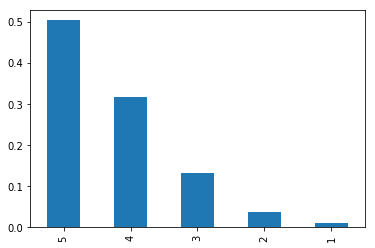

In [5]:
#checking the distribution of classes
#we can see that most of data is rated 5 or 4 and there is really small number of 1's and 2's
#that might be a problem for the model, but let's check the concept
df_all['rating'].value_counts(normalize=True).plot(kind='bar');

In [6]:
df_all['rating'].value_counts(normalize=True)

5    0.503003
4    0.315837
3    0.131619
2    0.038461
1    0.011079
Name: rating, dtype: float64

In [7]:
df_all['rating'].value_counts()

5    181055
4    113685
3     47376
2     13844
1      3988
Name: rating, dtype: int64

In [8]:
df_1_rating = df_all[df_all['rating'] == 1]
df_2_rating = df_all[df_all['rating'] == 2]
df_3_rating = df_all[df_all['rating'] == 3]
df_4_rating = df_all[df_all['rating'] == 4]
df_5_rating = df_all[df_all['rating'] == 5]

In [9]:
df_negativ = pd.DataFrame()
df_negativ = df_negativ.append(df_1_rating)
df_negativ = df_negativ.append(df_2_rating)
df_negativ.shape

(17832, 2)

In [10]:
df_positiv = pd.DataFrame()
df_positiv = df_positiv.append(df_4_rating)
df_positiv = df_positiv.append(df_5_rating)
df_positiv = df_positiv.sample(n=17832)
df_positiv.shape

(17832, 2)

In [11]:
df_all = pd.DataFrame()
df_all = df_all.append(df_negativ)
df_all = df_all.append(df_positiv)
df_all.shape

(35664, 2)

In [12]:
df_all['sentiment'] = df_all['rating'].map(lambda x: 0 if x<3 else 1)
df_all.sample(5)

,rating,fullTextHtml,sentiment
73377,4,"<p></p>\n<p>Vergleicht man „Sex and the dorf“ mit dem Vorgängerroman („Löffelchenliebe“) der Autorin, so wirkt das aktuelle Buch erwachsener und reifer. Ich persönlich fand es interessant, die Entwicklung zu sehen. „Sex and the dorf“ ordnet sich zwar in den Bereich Chick-Lit ein, geht aber tiefer. Es gibt einge lustige Stellen, die einen zum Schmunzeln bringen. Durch das Cover und den Titel erwartet man allerdings viel mehr Humor, dafür ist es stellenweise ernst und sehr emotional. <br> Die ...",1
307810,2,"<p>Die Geschichte fand ich gut, mal was Neues! Ein Kranker Täter, aber darauf kommt man sehr schnell.....die Ermittler ebenfalls. Das Buch wurde aber durch endlos lange Verhöre ewig in die Länge gezogen. Ich dachte da kommt noch was und hab es tatsächlich bis Ende durchgekaut....warum macht man das ? Dafür habe ich auf jeden Fall einen Stern abgezogen!&nbsp;</p>",0
29477,1,"<p></p>\n<p>Achtung: Dies ist der zweite Teil der Reihe um Lizzy und Sam. Dementsprechend können Spoiler enthalten sein, wenn der erste Band nicht bekannt ist!</p> \n<p>Lizzy ist schwanger. Eigentlich wäre das ein Grund zur Freude, wenn Sam nicht von den Dämonen seiner Vergangenheit heimgesucht werden würde, weshalb er sich immer mehr von Lizzy distanziert, die gar nicht weiß, wie ihr geschieht.<br> Als ihre Granny Geburtstag hat, kehrt Lizzy alleine in ihre Heimat zurück, in der sie auch au...",0
143594,5,"<p>Das Cover ist sehr ansprechend gestaltet. Es ist schlicht, die Schrift ist jedoch auffälliger und hebt sich hervor. Die Haptik ist sehr angenehm und trotz des gebundenen Hardcovers ist es nicht zu schwer.&nbsp;</p>\n<div>\n Es zeigt eine ältere Dame und einen jüngeren Mann nebeneinander.&nbsp;\n</div>\n<div> \n <br>\n</div>\n<div>\n Lazy ist verliebt in Elsie und daneben existiert für ihn nichts anderes mehr. &nbsp;\n</div>\n<div>\n Er geht voll darin auf, sodaß die Katastrophe, wenn d...",1
353331,5,"<p>Betty nimmt sich von ihrem Leben und ihrem Partner Paul eine Auszeit um zu schreiben.<br></p>\n<div>\n Es verschlägt sie nach Kroatien, wo sie in einer Küstenstadt wohnt und abends die Delphine bewundert wenn diese im Meer ihrer Lebenslust Ausdruck verleihen. Sie fühlt sich mit ihnen verbunden, möchte auch so frei sein...\n</div>\n<div>\n Überraschend trifft sie Erik, einen alten Schulfreund, welcher ihr nach einer romantischen Nacht einen Delphin aus Stein schenkt.... \n <br>\n</div>\n...",1


In [13]:
X = df_all['fullTextHtml'].values
y = df_all['sentiment'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8888)

In [15]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([13288, 13460], dtype=int64))

In [16]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([4544, 4372], dtype=int64))

In [17]:
#bag of words
#Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, 
#which builds a dictionary of features and transforms documents to feature vectors

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(26748, 179766)

In [18]:
#checking some typical words if they are in vocabulary
count_vect.vocabulary_.get('wunderbar')

172236

In [19]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(26748, 179766)

NAIVE BAYES

In [20]:
#In order to make the vectorizer => transformer => classifier easier to work with, scikit-learn provides a Pipeline class
#that behaves like a compound classifier

text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
 ])

In [21]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [22]:
#evaluation on test set
predicted = text_clf.predict(X_test)
print(accuracy_score(y_test,predicted))

0.8903095558546433


SVM

In [28]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=8888,
                          max_iter=10, tol=None)),
])

text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)
print(accuracy_score(y_test,predicted))

0.860699865410498


In [29]:
#more detailed metrics
print(metrics.classification_report(y_test, predicted, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      4544
           1       0.81      0.93      0.87      4372

    accuracy                           0.86      8916
   macro avg       0.87      0.86      0.86      8916
weighted avg       0.87      0.86      0.86      8916



XGBOOST

In [30]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', xgb.XGBClassifier(random_state=8888, max_depth=7, n_estimators=300, objective='multi:softmax', num_class=2)),
])

text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)
print(accuracy_score(y_test,predicted))

0.9121803499327052


In [31]:
#more detailed metrics
print(metrics.classification_report(y_test, predicted, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4544
           1       0.90      0.92      0.91      4372

    accuracy                           0.91      8916
   macro avg       0.91      0.91      0.91      8916
weighted avg       0.91      0.91      0.91      8916

